In [1]:
# 學號：0716026
# 姓名：蕭楚澔

In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import prettytable as pt

In [4]:
# Data Input

# normal list for visualization
with open('agaricus-lepiota.data') as datafile:
    datasets = datafile.readlines()

# pd dataframe for training and testing
read_file = pd.read_csv (r'agaricus-lepiota.data', header=None)
read_file.columns = ['type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
read_file.to_csv (r'mushroom.csv', index=None)
df = pd.read_csv('mushroom.csv')

['p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\n', 'e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\n', 'e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\n', 'p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\n', 'e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\n', 'e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\n', 'e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\n', 'e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\n', 'p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\n', 'e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\n', 'e,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\n', 'e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\n', 'e,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\n', 'p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\n', 'e,x,f,n,f,n,f,w,b,n,t,e,s,f,w,w,p,w,o,e,k,a,g\n', 'e,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,y,u\n', 'e,f,f,w,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\n', 'p,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g\n', 'p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,s,u\n', 'p,x,s,n,t,p,f,c,n,k,e,e,s,s,w

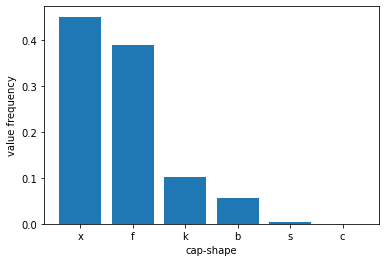

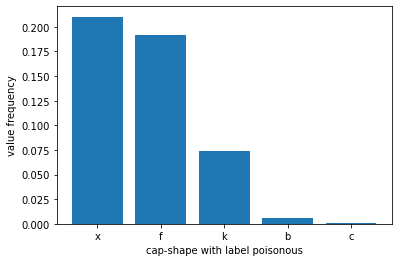

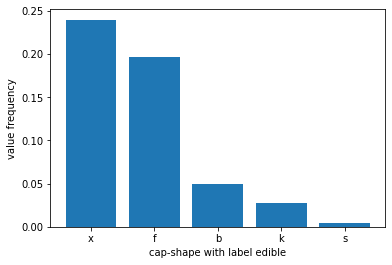

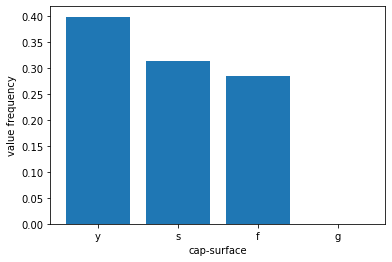

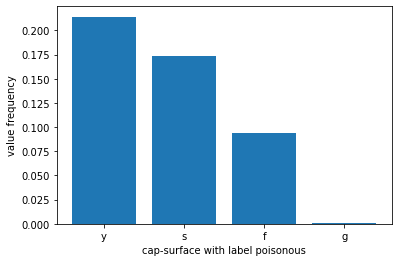

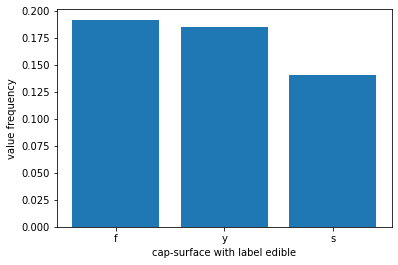

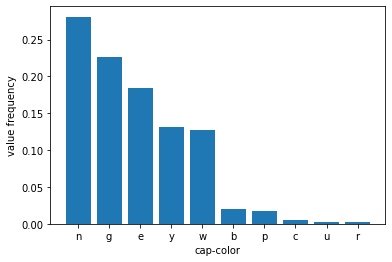

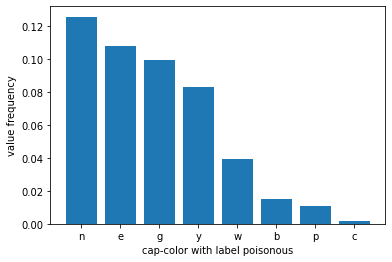

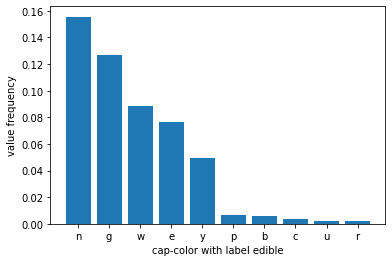

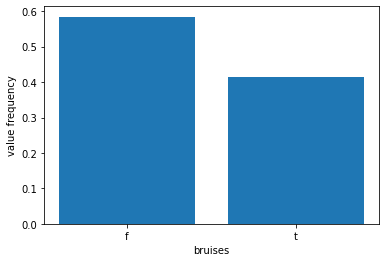

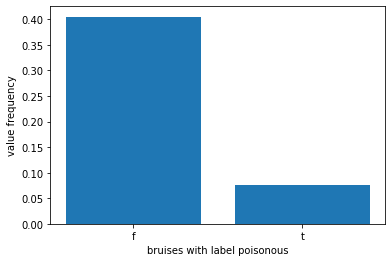

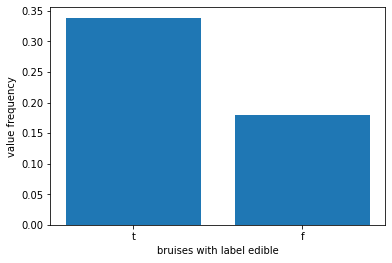

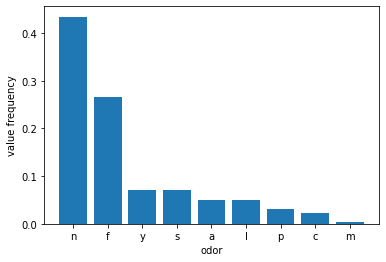

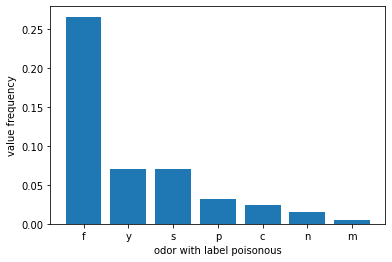

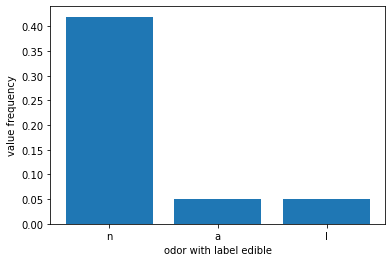

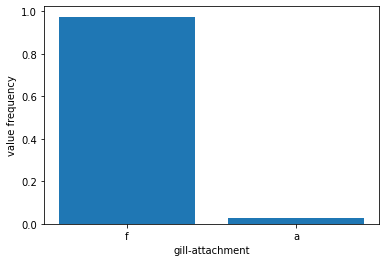

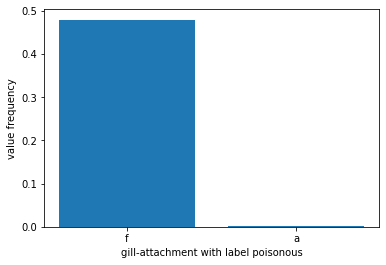

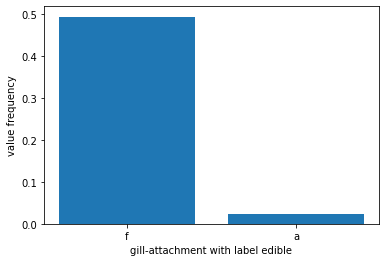

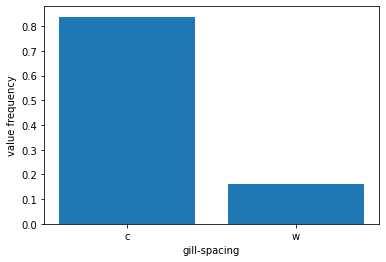

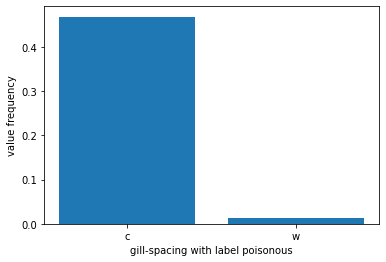

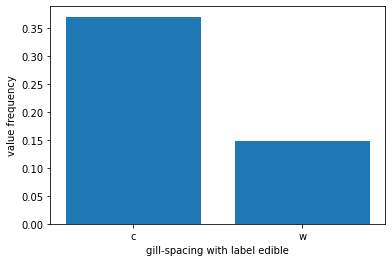

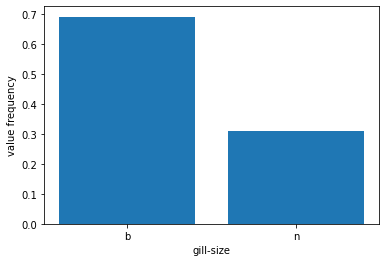

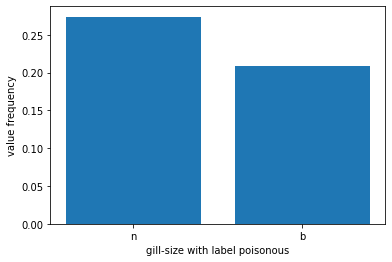

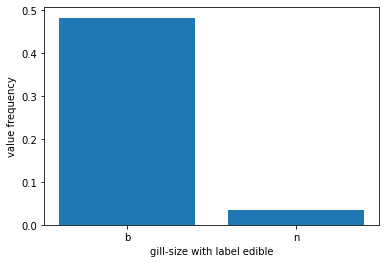

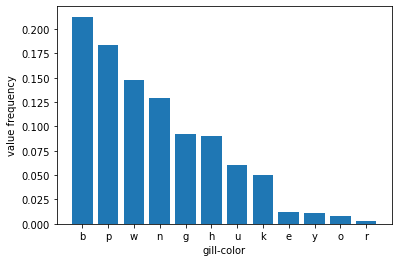

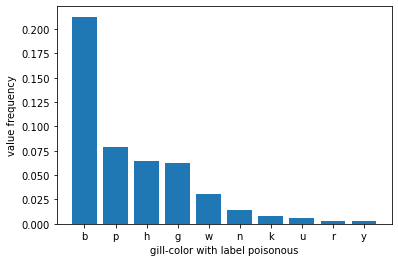

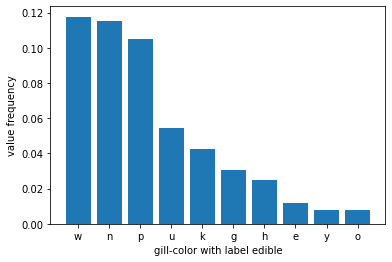

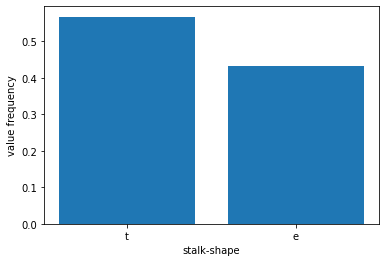

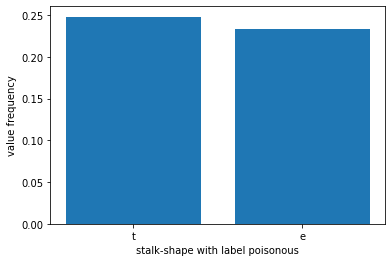

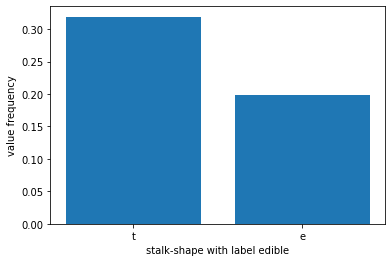

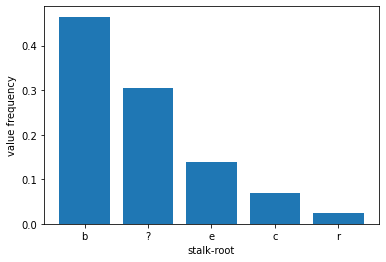

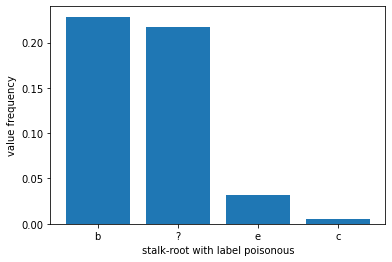

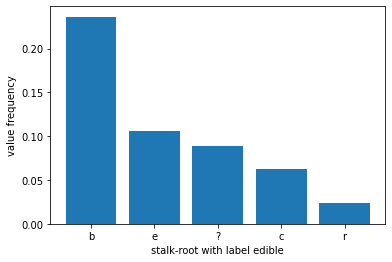

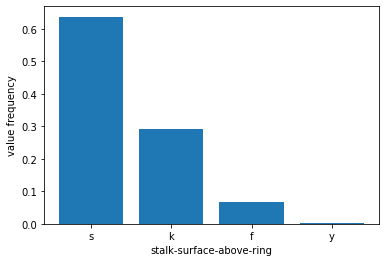

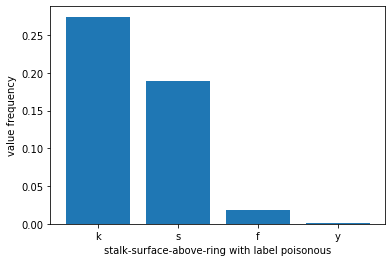

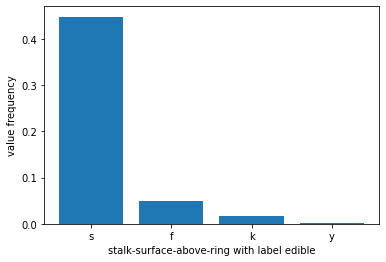

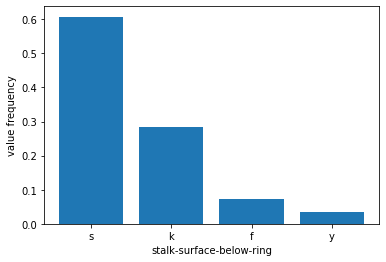

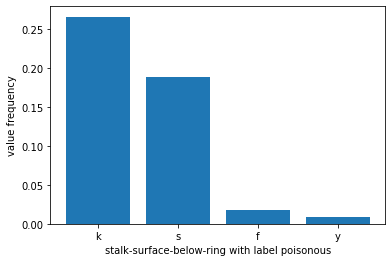

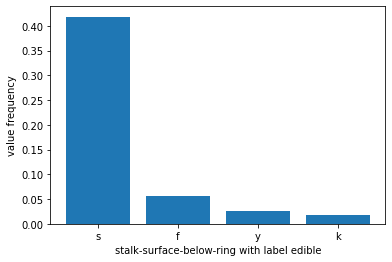

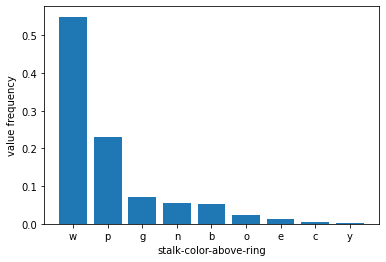

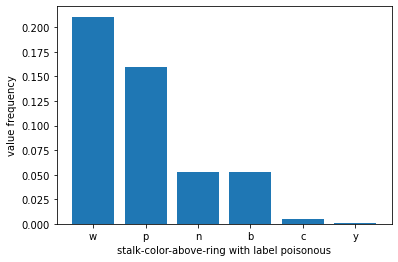

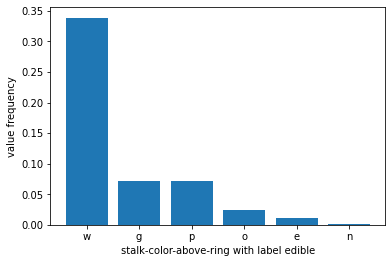

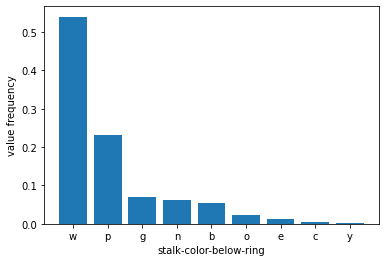

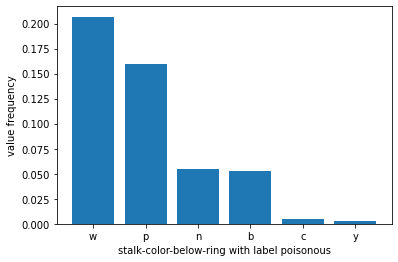

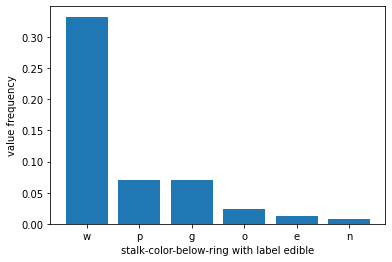

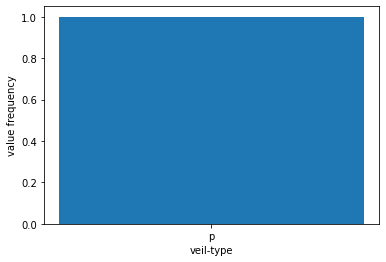

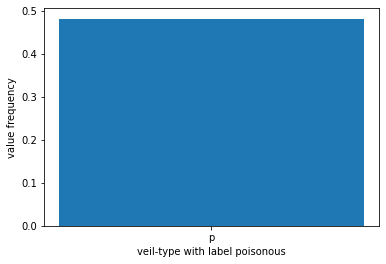

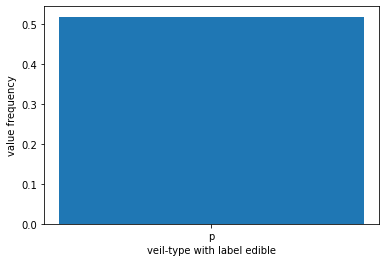

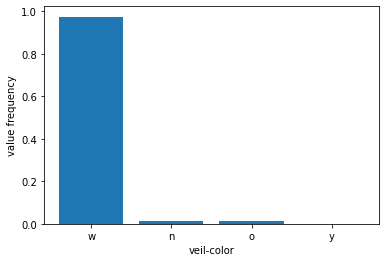

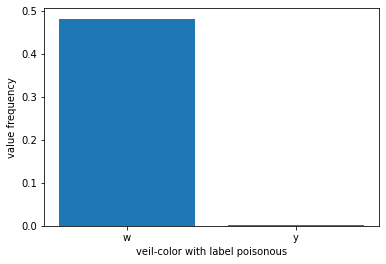

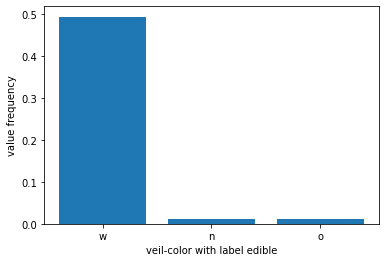

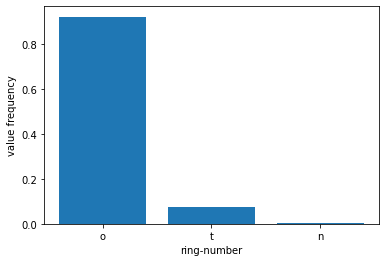

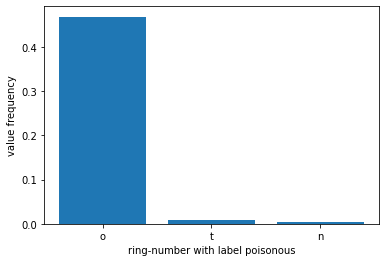

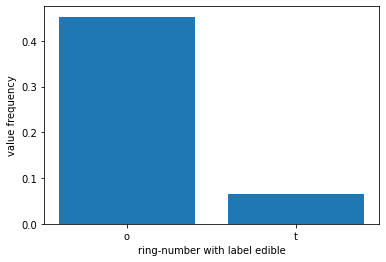

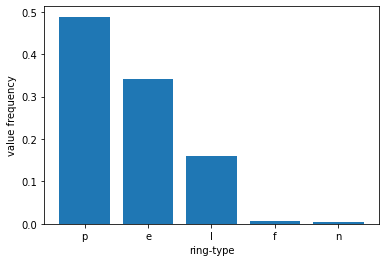

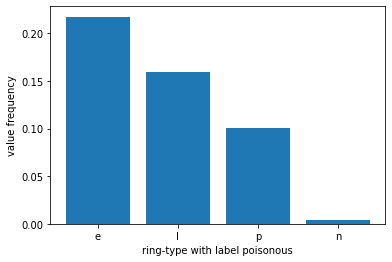

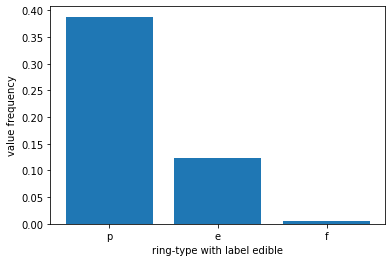

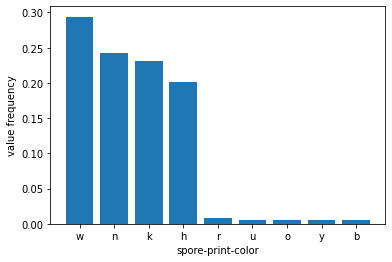

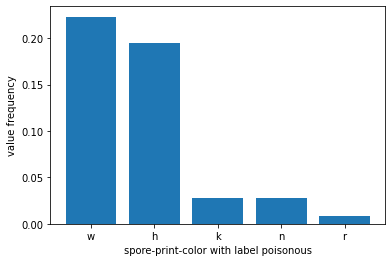

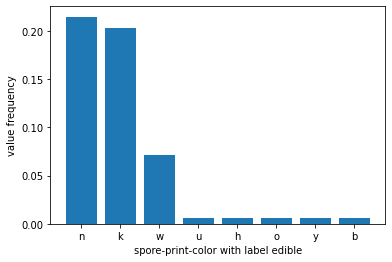

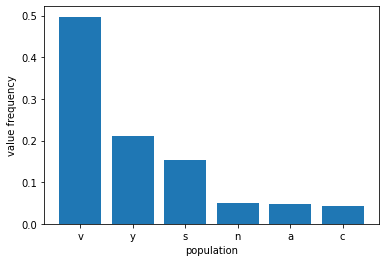

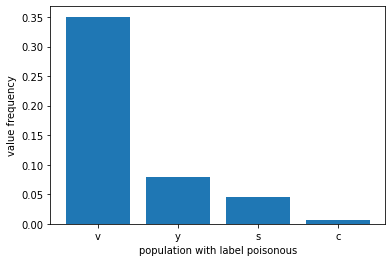

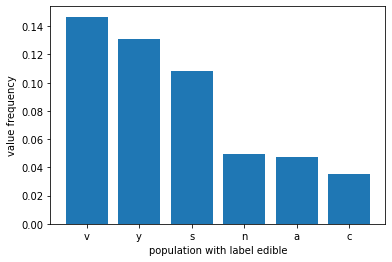

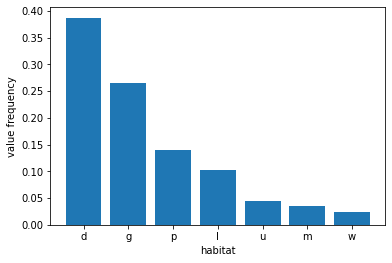

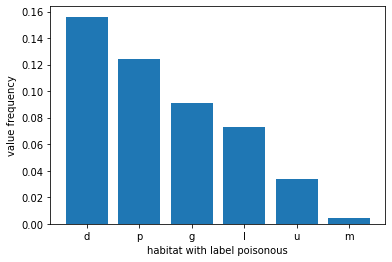

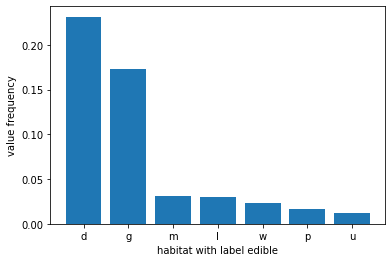

In [4]:
# Data Visualization

col_index = ['type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
data_with_feature = []
data_with_label1 = []
data_with_label2 = []
# collect data with sperate feature and data with specific labels
for feature_num in range(2, 45, 2):
    for line in datasets:
        data_with_feature.append(line[feature_num])
        if(line[0] == 'p'):
            data_with_label1.append(line[feature_num])
        else:
            data_with_label2.append(line[feature_num])
            
    # Show the data distribution by value frequency of every feature.
    x_plot = []
    y_plot = []
    d_p1 = np.array(data_with_feature)
    d_p2 = Counter(d_p1)
    d_p3 = sorted(d_p2.items(), key=lambda x:x[1], reverse=True)
    for attribute in d_p3:
        x_plot.append(attribute[0])
        y_plot.append(attribute[1]/len(datasets))
    x = np.arange(len(x_plot))
    # plot the chart
    plt.bar(x, y_plot)
    plt.xticks(x, x_plot)
    plt.xlabel(col_index[int(feature_num/2)])
    plt.ylabel("value frequency")
    plt.show()
    data_with_feature.clear()
    x_plot.clear()
    y_plot.clear()
    
    # Split data based on their labels (targets) and show the data distribution of each feature again.
    # for poisonous
    d1_p1 = np.array(data_with_label1)
    d1_p2 = Counter(d1_p1)
    d1_p3 = sorted(d1_p2.items(), key=lambda x:x[1], reverse=True)
    for attribute in d1_p3:
        x_plot.append(attribute[0])
        y_plot.append(attribute[1]/len(datasets))
    x = np.arange(len(x_plot))
    # plot the chart
    plt.bar(x, y_plot)
    plt.xticks(x, x_plot)
    plt.xlabel(col_index[int(feature_num/2)] + " with label poisonous")
    plt.ylabel("value frequency")
    plt.show()
    data_with_label1.clear()
    x_plot.clear()
    y_plot.clear()

    # for edible
    d2_p1 = np.array(data_with_label2)
    d2_p2 = Counter(d2_p1)
    d2_p3 = sorted(d2_p2.items(), key=lambda x:x[1], reverse=True)
    for attribute in d2_p3:
        x_plot.append(attribute[0])
        y_plot.append(attribute[1]/len(datasets))
    x = np.arange(len(x_plot))
    # plot the chart
    plt.bar(x, y_plot)
    plt.xticks(x, x_plot)
    plt.xlabel(col_index[int(feature_num/2)] + " with label edible")
    plt.ylabel("value frequency")
    plt.show()
    data_with_label2.clear()
    x_plot.clear()
    y_plot.clear()


In [5]:
# Data Preprocessing

# Transform data format and shape so your model can process them.
ds = df.apply(LabelEncoder().fit_transform)

# Drop features with any missing value.
ds.dropna()

# Shuffle the data.
ds = shuffle(ds)


In [6]:
# Model Construction

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

In [7]:
# Training and predicting

# without laplace
def without_laplace(X_train, y_train, X_test, y_test):
    # set alpha = 0.000...1(without laplace smoothing)
    cnb_without_laplace = MultinomialNB(alpha=1.0e-10)
    # train with training data
    cnb_without_laplace.fit(X_train, y_train)
    # predict the result with test data
    y_pred_cnb_without_laplace = cnb_without_laplace.predict(X_test)
    return y_pred_cnb_without_laplace

# with laplace
def with_laplace(X_train, y_train, X_test, y_test):
    # set alpha = 10(with laplace smoothing)
    cnb_with_laplace = MultinomialNB(alpha=10)
    # train with training data
    cnb_with_laplace.fit(X_train, y_train)
    # predict the result with test data
    y_pred_cnb_with_laplace = cnb_with_laplace.predict(X_test)
    return y_pred_cnb_with_laplace

In [8]:
# Train test split

# Holdout validation
X_train, X_test, y_train, y_test = train_test_split(ds.drop('type', axis=1), ds['type'], test_size=0.3, random_state=245)
y_pred_cnb_without_laplace = without_laplace(X_train, y_train, X_test, y_test)
y_pred_cnb_with_laplace = with_laplace(X_train, y_train, X_test, y_test)

# K-hold cross validation(write by myself)
K = 3
confusion_matrix_without_laplace = []
confusion_matrix_with_laplace = []
accuracy_without_laplace = []
accuracy_with_laplace = []
recall_without_laplace = []
recall_with_laplace = []
precision_without_laplace = []
precision_with_laplace = []
# C, D is empty, A is X, B is y(not yet split into train and test)
C, A, D, B = train_test_split(ds.drop('type', axis=1), ds['type'], train_size=1, random_state=100)
# split A into a1, a2, a3
a1 = A.iloc[:int(len(A)/3), :]
a2 = A.iloc[int(len(A)/3):int(len(A)*2/3), :]
a3 = A.iloc[int(len(A)*2/3):, :]
index = [[1, 2], [0, 2], [0, 1]]
a = [a1, a2, a3]
# split B into b1, b2, b3
b1 = B.iloc[:int(len(B)/3)]
b2 = B.iloc[int(len(B)/3):int(len(B)*2/3)]
b3 = B.iloc[int(len(B)*2/3):]
b = [b1, b2, b3]
# if i is 0, test data is a1 and b1, while train data is a2,a3,b2,b3. vice versa.
for i in range(0, K):
    X_train_K = pd.concat([a[index[i][0]], a[index[i][1]]])
    X_test_K = a[i]
    y_train_K = pd.concat([b[index[i][0]], b[index[i][1]]])
    y_test_K = b[i]
    y_pred_K_without_laplace = without_laplace(X_train_K, y_train_K, X_test_K, y_test_K)
    y_pred_K_with_laplace = with_laplace(X_train_K, y_train_K, X_test_K, y_test_K)
    confusion_n = confusion_matrix(y_test_K, y_pred_K_without_laplace)
    confusion_l = confusion_matrix(y_test_K, y_pred_K_with_laplace)
    confusion_matrix_without_laplace.append(confusion_n)
    confusion_matrix_with_laplace.append(confusion_l)
    acc_n = accuracy_score(y_test_K, y_pred_K_without_laplace)
    acc_l = accuracy_score(y_test_K, y_pred_K_with_laplace)
    accuracy_without_laplace.append(acc_n)
    accuracy_with_laplace.append(acc_l)
    rec_n = recall_score(y_test_K, y_pred_K_without_laplace)
    rec_l = recall_score(y_test_K, y_pred_K_with_laplace)
    recall_without_laplace.append(rec_n)
    recall_with_laplace.append(rec_l)
    pre_n = precision_score(y_test_K, y_pred_K_without_laplace)
    pre_l = precision_score(y_test_K, y_pred_K_with_laplace)
    precision_without_laplace.append(pre_n)
    precision_with_laplace.append(pre_l)

# calculate average of confusion matrix 
matrix_sum_without_laplace = [[0, 0], [0, 0]]
matrix_sum_with_laplace = [[0, 0], [0, 0]]
for i in range(0, K):
    matrix_sum_without_laplace[0][0] += confusion_matrix_without_laplace[i][0][0].item()
    matrix_sum_with_laplace[0][0] += confusion_matrix_with_laplace[i][0][0].item()
    matrix_sum_without_laplace[0][1] += confusion_matrix_without_laplace[i][0][1].item()
    matrix_sum_with_laplace[0][1] += confusion_matrix_with_laplace[i][0][1].item()
    matrix_sum_without_laplace[1][0] += confusion_matrix_without_laplace[i][1][0].item()
    matrix_sum_with_laplace[1][0] += confusion_matrix_with_laplace[i][1][0].item()
    matrix_sum_without_laplace[1][1] += confusion_matrix_without_laplace[i][1][1].item()
    matrix_sum_with_laplace[1][1] += confusion_matrix_with_laplace[i][1][1].item()

matrix_sum_without_laplace = np.array(matrix_sum_without_laplace)
matrix_sum_with_laplace = np.array(matrix_sum_with_laplace)
matrix_sum_without_laplace_new = matrix_sum_without_laplace/3
matrix_sum_with_laplace_new = matrix_sum_with_laplace/3


In [9]:
# Result

Without_laplace_h = ["Without laplace(Holdout validation)", np.around(confusion_matrix(y_test, y_pred_cnb_without_laplace), 5), np.around(accuracy_score(y_test, y_pred_cnb_without_laplace), 5), np.around(recall_score(y_test, y_pred_cnb_without_laplace), 5), np.around(precision_score(y_test, y_pred_cnb_without_laplace), 5)]
With_laplace_h = ["With laplace(Holdout validation)", np.around(confusion_matrix(y_test, y_pred_cnb_with_laplace), 5), np.around(accuracy_score(y_test, y_pred_cnb_with_laplace), 5), np.around(recall_score(y_test, y_pred_cnb_with_laplace), 5), np.around(precision_score(y_test, y_pred_cnb_with_laplace), 5)]
Without_laplace_k = ["Without laplace(K-hold)", np.around(matrix_sum_without_laplace_new, 5), np.around(statistics.mean(accuracy_without_laplace), 5), np.around(statistics.mean(recall_without_laplace), 5), np.around(statistics.mean(precision_without_laplace), 5)]
With_laplace_k = ["With laplace(K-hold)", np.around(matrix_sum_with_laplace_new, 5), np.around(statistics.mean(accuracy_with_laplace), 5), np.around(statistics.mean(recall_with_laplace), 5), np.around(statistics.mean(precision_with_laplace), 5)]

output = pt.PrettyTable()
output.field_names = ["Method", "Confusion matrix", "Accuracy", "Recall", "Precision"]
output.add_row(Without_laplace_h)
output.add_row(With_laplace_h)
output.add_row(Without_laplace_k)
output.add_row(With_laplace_k)

print("mushroom result")
print(output)

mushroom result
+-------------------------------------+---------------------------+----------+---------+-----------+
|                Method               |      Confusion matrix     | Accuracy |  Recall | Precision |
+-------------------------------------+---------------------------+----------+---------+-----------+
| Without laplace(Holdout validation) |        [[1196   89]       | 0.80271  | 0.66002 |  0.89529  |
|                                     |        [ 392  761]]       |          |         |           |
|   With laplace(Holdout validation)  |        [[1195   90]       | 0.80189  | 0.65915 |  0.89412  |
|                                     |        [ 393  760]]       |          |         |           |
|       Without laplace(K-hold)       |  [[1312.33333   90.     ] | 0.80549  | 0.66538 |  0.90644  |
|                                     |  [ 436.66667  868.66667]] |          |         |           |
|         With laplace(K-hold)        |  [[1311.66667   90.66667] | 0.80488

Show 𝑃(𝑋𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔|𝑌=𝑒) with and without Laplace smoothing by bar charts


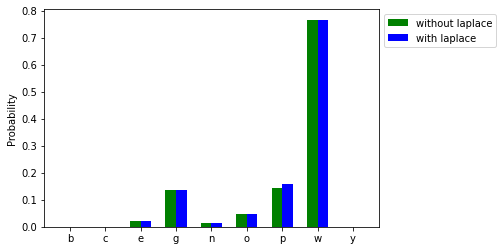

In [10]:
# Questions
# Show 𝑃(𝑋𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔|𝑌=𝑒) with and without Laplace smoothing by bar charts

result_without_laplace = []
result_with_laplace = []
# calculate probability of edibale
p_of_e = len(ds.loc[ds['type'] == 0])/len(ds)
# b=0 c=1 e=2 g=3 n=4 o=5 p=6 w=7 y=8
label = ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']

for i in range(0, 9):
    ds_t = ds.loc[ds['stalk-color-below-ring'] == i]
    X_train, X_test, y_train, y_test = train_test_split(ds_t.drop('type', axis=1), ds_t['type'], test_size=0.3, random_state=245)
    y_result_without_laplace = without_laplace(X_train, y_train, X_test, y_test)
    y_result_with_laplace = with_laplace(X_train, y_train, X_test, y_test)
    # calculate P(Y = edibale | Xstalk-color-below-ring)
    e_under_X_without_laplace = (y_result_without_laplace == 0).sum()/len(y_result_without_laplace)
    e_under_X_with_laplace = (y_result_with_laplace == 0).sum()/len(y_result_with_laplace)
    # calculate probability of Xstalk-color-below-ring
    p_of_X = len(ds_t)/len(ds)
    # according to P(A|B) = P(B|A)*P(A)/P(B)
    r_without_laplace = e_under_X_without_laplace * p_of_X / p_of_e
    r_with_laplace = e_under_X_with_laplace * p_of_X / p_of_e
    
    result_without_laplace.append(r_without_laplace)
    result_with_laplace.append(r_with_laplace)

print("Show 𝑃(𝑋𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔|𝑌=𝑒) with and without Laplace smoothing by bar charts")
# plot the bar chart
x = np.arange(len(label))
width = 0.3
plt.bar(x, result_without_laplace, width, color='green', label='without laplace')
plt.bar(x + width, result_with_laplace, width, color='blue', label='with laplace')
plt.xticks(x + width / 2, label)
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()